# Glass Identification

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df= pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv")
df

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [3]:
df= df.rename(columns={'1':'ID','1.52101':'RI', '13.64':'Na', '4.49':'Mg','1.10':'Ai','71.78':'Si','0.06':'K', '8.75':'Ca', '0.00':'Ba', '0.00.1':'Fe', '1.1':'Type of Glass'})
df

,ID,RI,Na,Mg,Ai,Si,K,Ca,Ba,Fe,Type of Glass
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [4]:
df.head()

,ID,RI,Na,Mg,Ai,Si,K,Ca,Ba,Fe,Type of Glass
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [5]:
df.shape

(213, 11)

In [6]:
df.describe()

,ID,RI,Na,Mg,Ai,Si,K,Ca,Ba,Fe,Type of Glass
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,108.000000,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,61.631972,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,2.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,55.000000,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,108.000000,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,161.000000,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [7]:
df.columns

Index(['ID', 'RI', 'Na', 'Mg', 'Ai', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'Type of Glass'],
      dtype='object')

In [8]:
df.dtypes

ID                 int64
RI               float64
Na               float64
Mg               float64
Ai               float64
Si               float64
K                float64
Ca               float64
Ba               float64
Fe               float64
Type of Glass      int64
dtype: object

Text(0.5, 1.0, 'Count of Glass Types')

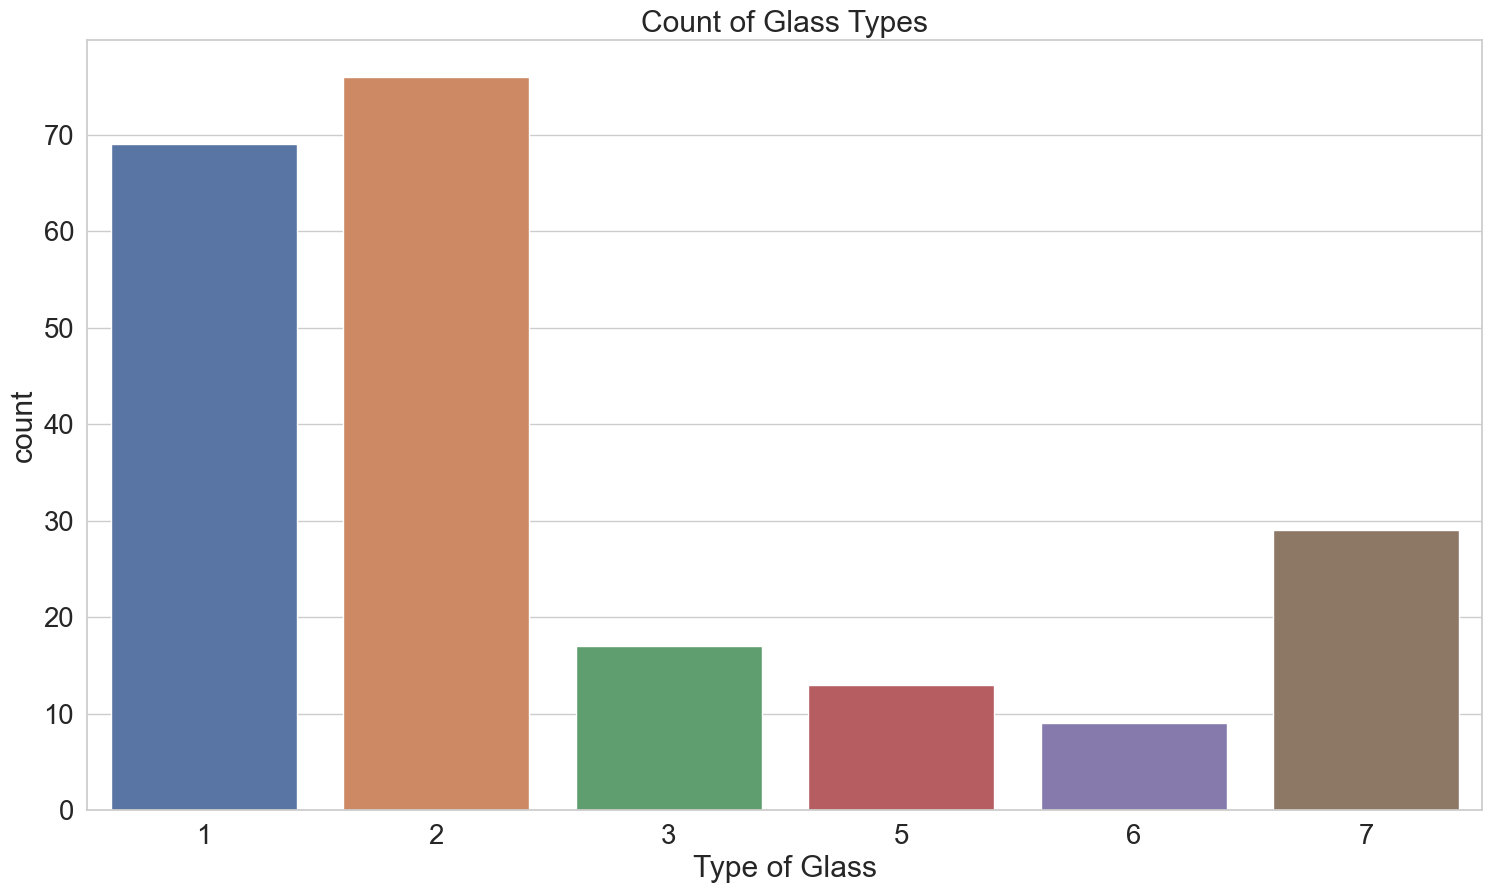

In [9]:
sns.set(style= "whitegrid",font_scale=1.8)
plt.subplots(figsize=(18,10))
sns.countplot('Type of Glass',data= df).set_title('Count of Glass Types')

Type 2 and 1 has highest occurance.

In [10]:
df.groupby('Type of Glass',as_index= False).mean()

,Type of Glass,ID,RI,Na,Mg,Ai,Si,K,Ca,Ba,Fe
0,1,36.0,1.518685,13.236522,3.538841,1.164783,72.631304,0.453043,8.797971,0.012899,0.057826
1,2,108.5,1.518619,13.111711,3.002105,1.408158,72.598026,0.521053,9.073684,0.050263,0.079737
2,3,155.0,1.517964,13.437059,3.543529,1.201176,72.404706,0.406471,8.782941,0.008824,0.057059
3,5,170.0,1.518928,12.827692,0.773846,2.033846,72.366154,1.470000,10.123846,0.187692,0.060769
4,6,181.0,1.517456,14.646667,1.305556,1.366667,73.206667,0.000000,9.356667,0.000000,0.000000
5,7,200.0,1.517116,14.442069,0.538276,2.122759,72.965862,0.325172,8.491379,1.040000,0.013448


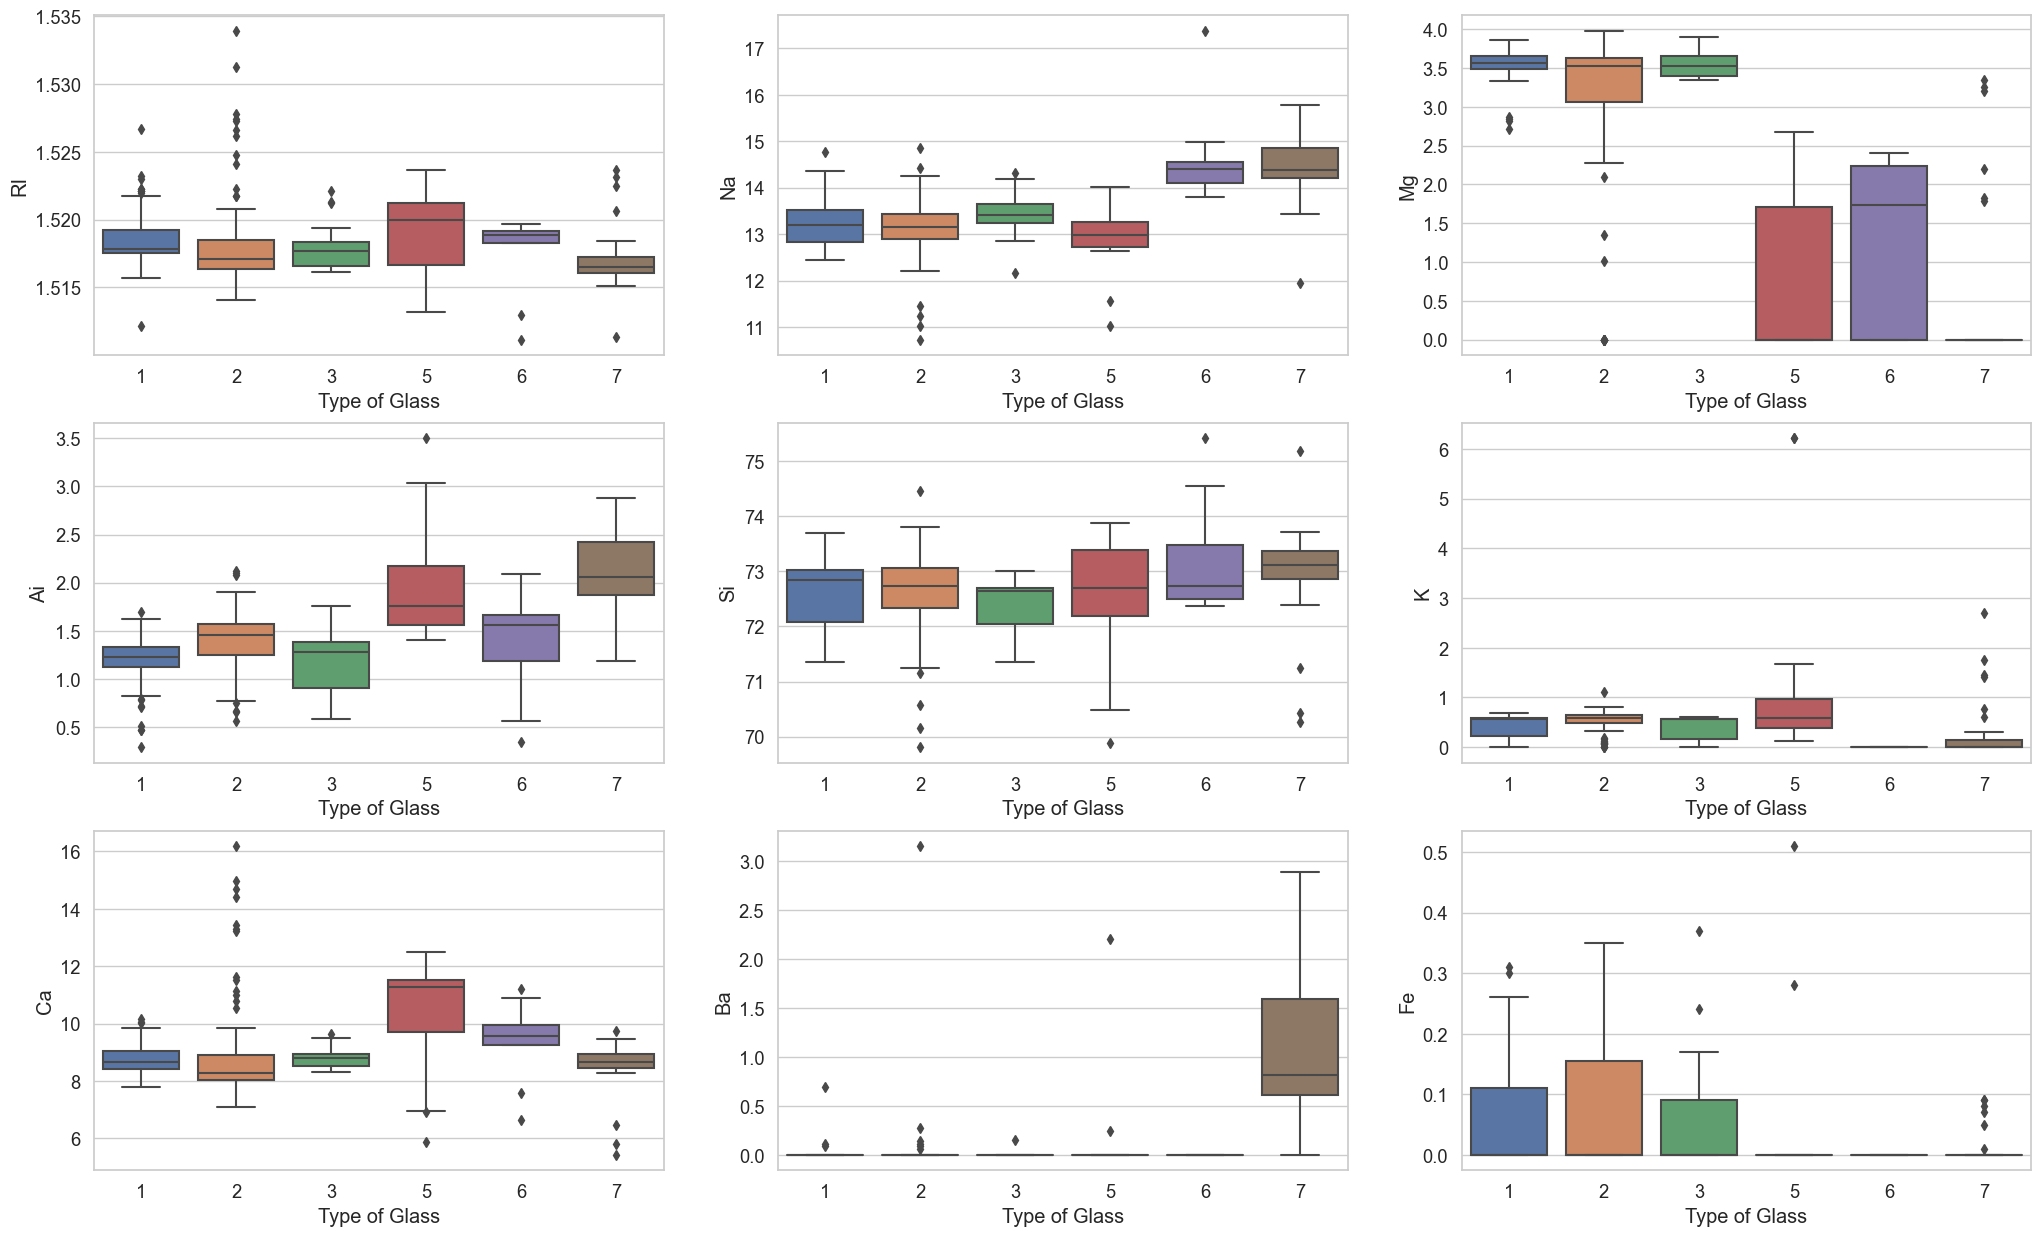

In [11]:
sns.set(style="whitegrid",font_scale=1.2)
plt.subplots(figsize= (25,15))
plt.subplot(3,3,1)
sns.boxplot(x='Type of Glass',y= 'RI', data= df)
plt.subplot(3,3,2)
sns.boxplot(x= 'Type of Glass',y= 'Na', data=df)
plt.subplot(3,3,3)
sns.boxplot(x='Type of Glass',y= 'Mg',data= df)
plt.subplot(3,3,4)
sns.boxplot(x='Type of Glass',y= 'Ai', data=df)
plt.subplot(3,3,5)
sns.boxplot(x= 'Type of Glass',y= 'Si',data=df)
plt.subplot(3,3,6)
sns.boxplot(x= 'Type of Glass',y='K', data=df)
plt.subplot(3,3,7)
sns.boxplot(x='Type of Glass',y ='Ca',data= df)
plt.subplot(3,3,8)
sns.boxplot(x= 'Type of Glass',y='Ba',data=df)
plt.subplot(3,3,9)
sns.boxplot(x= 'Type of Glass',y='Fe',data=df)
plt.show()

RI(Refractive Index) is similar in all types of glass.Type 5 has higher mean. Na(Sodium) is higher in type 6 and 7. Mg(Magnesium) is higher in 1, 2 and type 3 of glass.Ai(Aluminium) is higher in type 5 and 7. Si(Silicon) has similar range for all types of glass. K(Potassium) doesn't have much range in any of the types, whereas 5 is highest amongst all. Ca(Calcium) is highest in 5. Ba(Barium) is highest is 7 and Fe(Iron) is high in 1, 2 and 3 type of glass.

<AxesSubplot:>

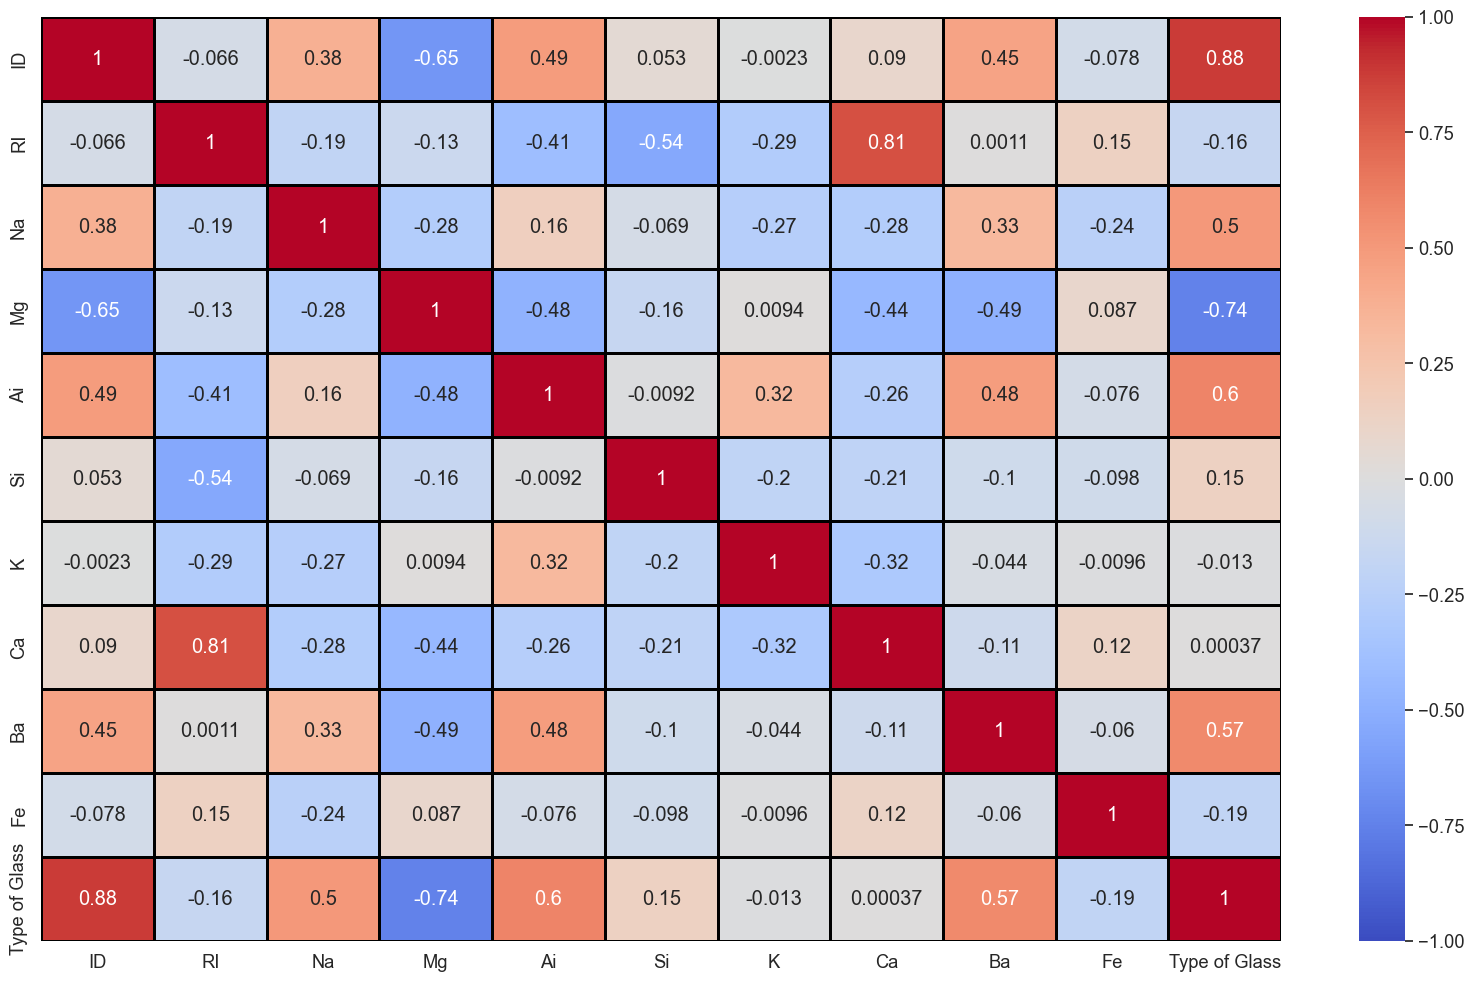

In [12]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),annot= True, vmin=-1, vmax=1, cmap= 'coolwarm',linewidths=2, linecolor='black')

In [13]:
X= df[['RI','Na','Mg','Ai','Si','K','Ca','Ba','Fe']]
y= df['Type of Glass']
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=0)

The data is split into training and test size

In [14]:
def metric_score(clf, X_train, X_test, y_train, y_test, train = True):
    if train:
        y_pred= clf.predict(X_train)
        print("\n===Train Result===")
        print(f"Accuracy Score:{accuracy_score(y_train,y_pred)*100: .2f}%")
        
    elif train==False:
        y_pred = clf.predict(X_test)
        print("\n===Test Result===")
        print(f"Accuracy Score:{accuracy_score(y_test,y_pred)*100: .2f}%")
        print('\n\n Test Classification Report \n', classification_report(y_test,y_pred,digits=2))

In [15]:
clf= DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [16]:
metric_score(clf,X_train,X_test,y_train,y_test,train=True)
metric_score(clf,X_train,X_test,y_train,y_test,train=False)


===Train Result===
Accuracy Score: 100.00%

===Test Result===
Accuracy Score: 69.77%


 Test Classification Report 
               precision    recall  f1-score   support

           1       0.64      0.78      0.70         9
           2       0.67      0.67      0.67        18
           3       0.60      0.50      0.55         6
           5       1.00      1.00      1.00         2
           6       1.00      0.50      0.67         2
           7       0.83      0.83      0.83         6

    accuracy                           0.70        43
   macro avg       0.79      0.71      0.74        43
weighted avg       0.71      0.70      0.70        43



The accuracy score is 69.77%

# Student Grades Predition

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/Grades.csv")
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [3]:
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [4]:
df.shape

(571, 43)

In [9]:
df.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [5]:
df.describe()

,CGPA
count,571.000000
mean,2.954888
std,0.620552
min,0.800000
25%,2.538000
50%,3.029000
75%,3.451000
max,3.985000


In [6]:
df.isnull().sum().sum()

425

# BANK MARKETING: Predicting Whether The Customer Will Subscribe To Term Deposit (Fixed Deposit) or not.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error as MSE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
df_train= pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv")
df_train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [3]:
df_test= pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv")
df_test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [4]:
df_train.shape

(31647, 18)

In [5]:
df_test.shape

(13564, 17)

In [6]:
df_train.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
df_test.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000
mean,22704.057726,40.887128,1358.496535,15.738646,258.278679,2.759510,41.648555,0.594441
std,12994.043329,10.604108,3082.940623,8.288174,258.488648,3.060928,101.985178,1.998193
min,1.000000,18.000000,-3313.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11546.000000,33.000000,71.000000,8.000000,102.000000,1.000000,-1.000000,0.000000
50%,22782.000000,39.000000,445.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33974.250000,48.000000,1413.250000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,45206.000000,95.000000,98417.000000,31.000000,3253.000000,58.000000,850.000000,55.000000


In [8]:
df_train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [9]:
df_test.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [10]:
df_train['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

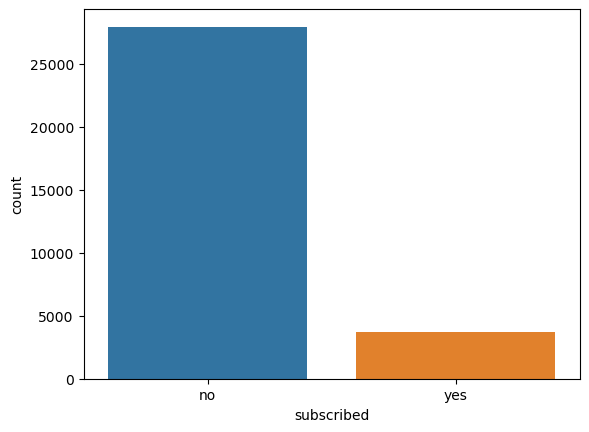

In [11]:
sns.countplot(x= 'subscribed',data= df_train)
plt.show()

In [12]:
df_train['subscribed'].value_counts(normalize= True)

no     0.882611
yes    0.117389
Name: subscribed, dtype: float64

it can be seen that 11.7% people have subscribed.

In [13]:
df_train['job'].value_counts()

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64

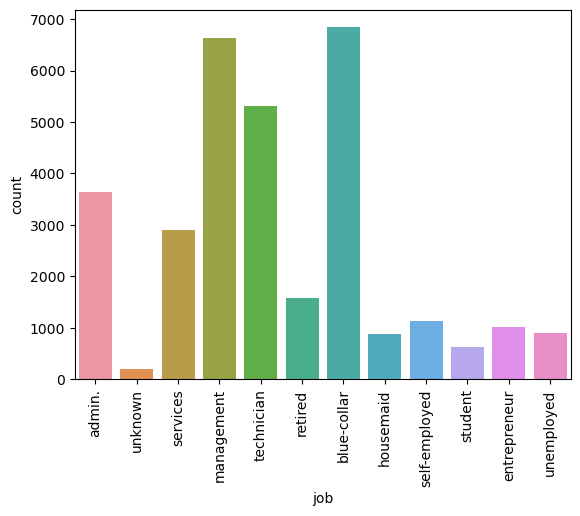

In [14]:
sns.countplot(x= 'job', data= df_train)
plt.xticks(rotation=90)
plt.show()

In [15]:
job= pd.crosstab(df_train['job'],df_train['subscribed'])
job

subscribed,no,yes
job,,
admin.,3179,452
blue-collar,6353,489
entrepreneur,923,85
housemaid,795,79
management,5716,923
retired,1212,362
self-employed,983,140
services,2649,254
student,453,182


In [16]:
job_normalize= job.div(job.sum(1).astype(float), axis=0)

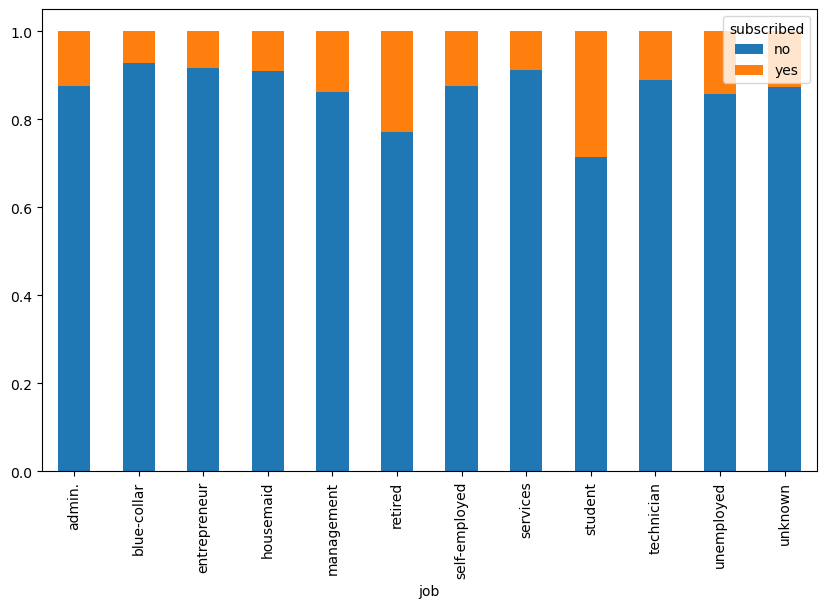

In [17]:
job_normalize.plot.bar(stacked= True, figsize=(10,6))
plt.show()

In [18]:
df_train['marital'].value_counts()

married     19095
single       8922
divorced     3630
Name: marital, dtype: int64

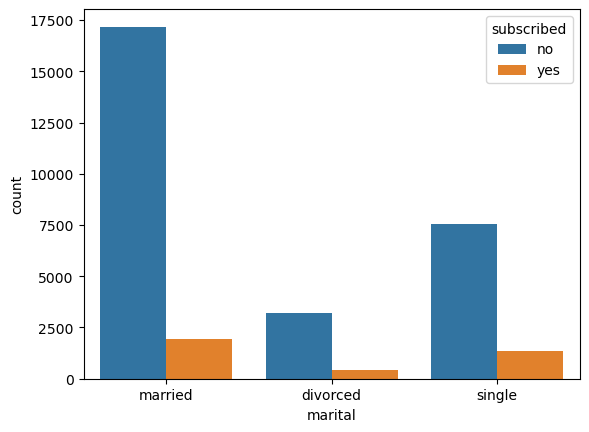

In [19]:
sns.countplot(x='marital',hue='subscribed',data= df_train)
plt.show()

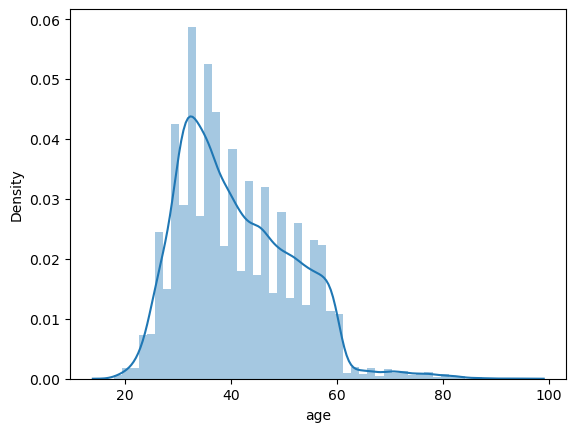

In [20]:
sns.distplot(df_train['age'])
plt.show()

people between 20-60 age have subscribed the most.

In [21]:
df_train['subscribed'].replace('yes',1, inplace= True)
df_train['subscribed'].replace('no',0, inplace= True)

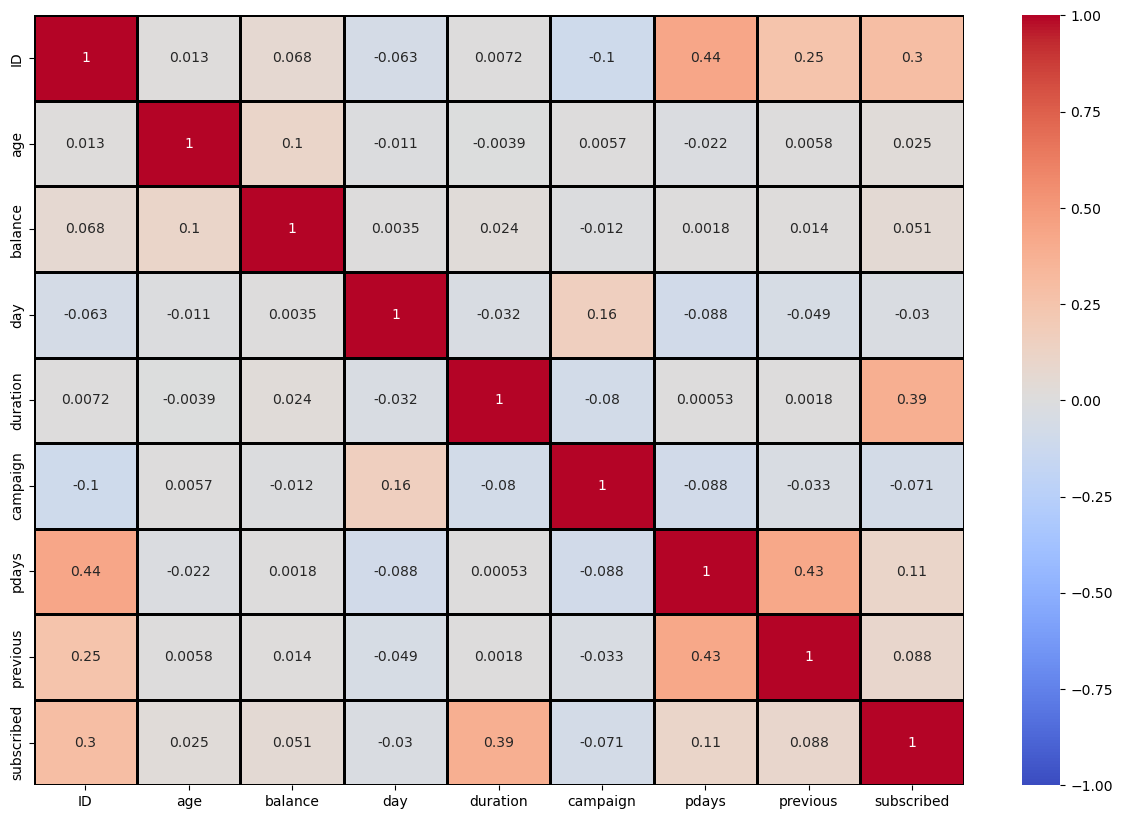

In [22]:
plt.figure(figsize=(15,10))
sns.heatmap(df_train.corr(), annot= True, vmin=-1, vmax=1, cmap='coolwarm', linewidths= 2, linecolor= 'black')
plt.show()

The duration is highly correlated with the target variable.There are higher chances of being subscribed to term deposit.

In [23]:
train= df_train.drop('subscribed',axis=1)
target= df_train['subscribed']

In [24]:
train= pd.get_dummies(train)
train.head()

,ID,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,26110,56,1933,19,44,2,-1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,40576,31,3,20,91,2,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,15320,27,891,18,240,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,43962,57,3287,22,867,1,84,3,0,0,...,1,0,0,0,0,0,0,0,1,0
4,29842,31,119,4,380,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [26]:
scale= StandardScaler()
train_scaled = scale.fit_transform(train)

In [27]:
X_train, X_test, y_train, y_test= train_test_split(train, target, test_size=0.2, random_state=12)

now the data is split into train and test data.

In [31]:
dlf= DecisionTreeClassifier(max_depth=4,random_state=0)

In [32]:
dlf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [33]:
predict= dlf.predict(X_test)

In [34]:
predict

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [35]:
accuracy_score(y_test,predict)

0.9042654028436019

We got an accuracy of 90% on the dataset.